In [ ]:
!pip uninstall -y torch torchvision torchaudio transformers
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install transformers accelerate


Found existing installation: torch 2.5.1+cu124
Uninstalling torch-2.5.1+cu124:
  Successfully uninstalled torch-2.5.1+cu124
Found existing installation: torchvision 0.20.1+cu124
Uninstalling torchvision-0.20.1+cu124:
  Successfully uninstalled torchvision-0.20.1+cu124
Found existing installation: torchaudio 2.5.1+cu124
Uninstalling torchaudio-2.5.1+cu124:
  Successfully uninstalled torchaudio-2.5.1+cu124
Found existing installation: transformers 4.48.3
Uninstalling transformers-4.48.3:
  Successfully uninstalled transformers-4.48.3
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 100.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 556.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.1 MB/s eta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 82.4 MB/s eta 0:00:00
ERROR: Operation cancelled by user
^C


In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud

# Télécharger les stopwords de nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('french'))

# Charger les données (remplace avec ton fichier)
file_path = "/content/apple_store_reviews_fr_final.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="apple_store_reviews_fr_cleaned")[['Note', 'Date', 'Avis']].dropna(subset=['Avis'])

# Vérifier les premières lignes
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Note,Date,Avis
0,1,2025-01-08 20:18:34,J’ai commencée à utiliser Vinted il y a un peu...
1,1,2025-01-05 23:00:52,Premier compte inaccessible du jour au lendema...
2,1,2024-12-10 19:19:34,Quand la vente ou l’achat se passe bien tout v...
3,1,2024-11-04 14:02:30,"Bonjour,"
4,1,2024-10-13 16:57:40,C'est vraiment une application de m****!! On a...


In [ ]:
# Initialiser le vectoriseur TF-IDF
vectorizer = TfidfVectorizer(stop_words=list(stop_words), max_features=500, ngram_range=(1,2))


# Transformer les avis en vecteurs
X = vectorizer.fit_transform(df["Avis"])

# Afficher la taille de la matrice TF-IDF
X.shape


(3815, 500)

In [ ]:
# Définir le nombre de clusters (ex: 5 sujets principaux)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

# Afficher un aperçu des clusters attribués
df[["Avis", "Cluster"]].head(10)


,Avis,Cluster
0,J’ai commencée à utiliser Vinted il y a un peu...,3
1,Premier compte inaccessible du jour au lendema...,3
2,Quand la vente ou l’achat se passe bien tout v...,3
3,"Bonjour,",0
4,C'est vraiment une application de m****!! On a...,3
5,Il y a des problèmes avec les colis plein de c...,3
6,"Vinted, top en apparence, jusqu’au jour où ils...",3
7,Si vous voulez vendre en simplicité cette appl...,3
8,Le concept Vinted etait génial malheureusement...,3
9,Le principe de base est bien il permet la seco...,3


In [ ]:
# Récupérer les mots-clés par cluster
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(n_clusters):
    print(f"\n🟢 **Cluster {i}** :")
    top_words = [terms[ind] for ind in order_centroids[i, :10]]
    print(", ".join(top_words))



🟢 **Cluster 0** :
bonjour, vinted, soucis, équipe, suite, déçue, avis, reçois, souci, carte

🟢 **Cluster 1** :
conformes, articles conformes, articles, conformes description, description, merci, rapide, envoi rapide, envoi, rapide articles

🟢 **Cluster 2** :
merci, rapide, articles, merci beaucoup, beaucoup, bcp, merci bcp, envoi, conforme, envoi rapide

🟢 **Cluster 3** :
vinted, très, articles, plus, bien, application, tout, prix, article, faire

🟢 **Cluster 4** :
bon, très bon, bon état, très, qualité, état, qualité prix, rapport qualité, rapport, prix


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


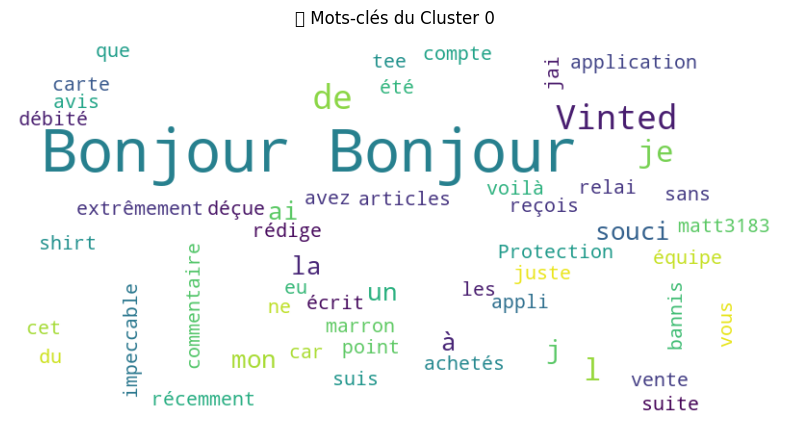

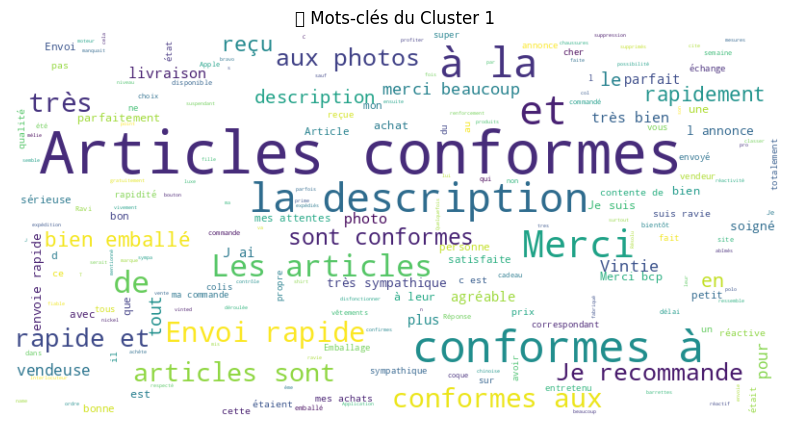

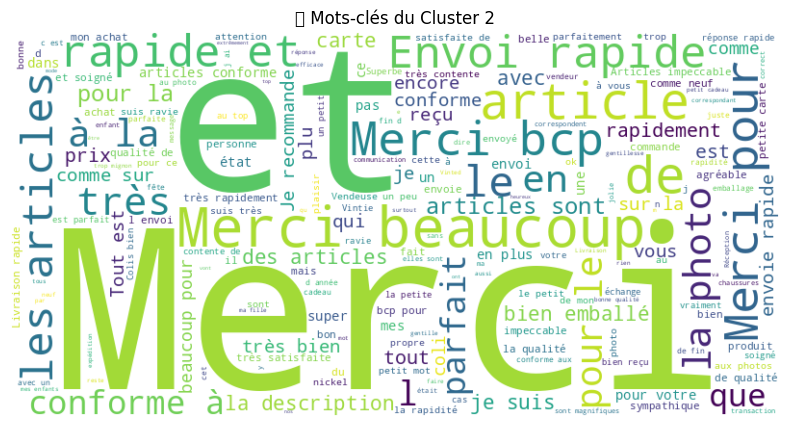

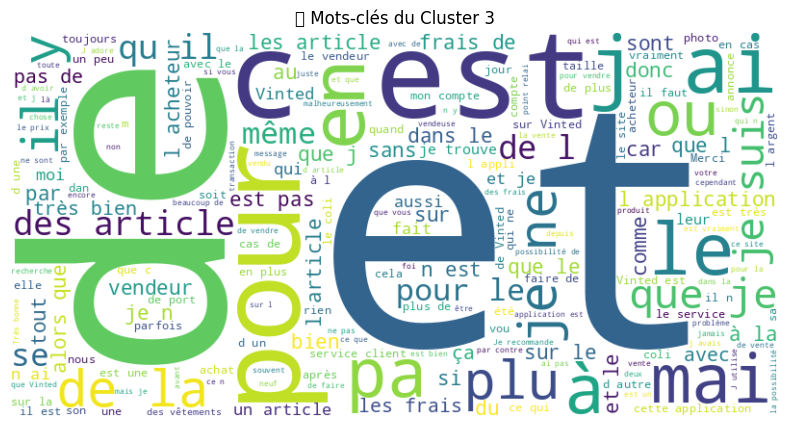

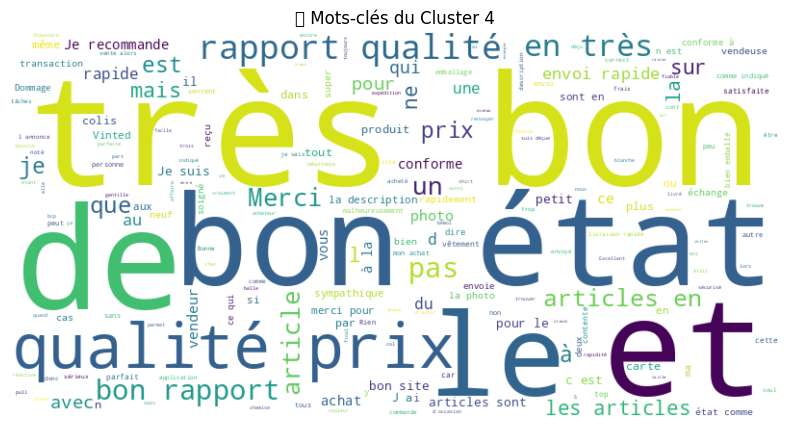

In [ ]:
for i in range(n_clusters):
    cluster_texts = " ".join(df[df["Cluster"] == i]["Avis"])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_texts)

    # Afficher le WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"🔹 Mots-clés du Cluster {i}")
    plt.show()


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

# Charger le fichier des avis
file_path = "/content/apple_store_reviews_fr_final.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="apple_store_reviews_fr_cleaned")[['Note', 'Date', 'Avis']].dropna(subset=['Avis'])

# Charger le modèle SBERT pour transformer les avis en vecteurs
sbert_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Convertir tous les avis en embeddings
embeddings = sbert_model.encode(df["Avis"].tolist(), convert_to_tensor=False)

# Transformer en format compatible avec Faiss (base de recherche rapide)
embeddings = np.array(embeddings).astype('float32')

# Création de l’index Faiss pour la recherche rapide
index = faiss.IndexFlatL2(embeddings.shape[1])  # L2 distance (euclidienne)
index.add(embeddings)

print(f"✅ {len(df)} avis indexés pour la recherche !")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ 3815 avis indexés pour la recherche !


In [ ]:
!pip install transformer

ERROR: Could not find a version that satisfies the requirement transformer (from versions: none)
ERROR: No matching distribution found for transformer


In [ ]:
def rechercher_avis_similaires(query, top_k=5):
    """ Recherche les avis les plus proches sémantiquement d'une requête donnée. """

    # Encoder la requête en embedding SBERT
    query_embedding = sbert_model.encode([query]).astype('float32')

    # Recherche dans l’index Faiss
    distances, indices = index.search(query_embedding, top_k)

    # Afficher les résultats
    print("\n🔎 **Avis similaires trouvés :**\n")
    for i, idx in enumerate(indices[0]):
        print(f"⭐️ **{i+1}. Note : {df.iloc[idx]['Note']}**")
        print(df.iloc[idx]['Avis'])
        print(f"📏 Distance : {distances[0][i]:.4f}\n")

# Exemple d'utilisation
rechercher_avis_similaires("Le service client ne répond pas, problème avec l'application.")



🔎 **Avis similaires trouvés :**

⭐️ **1. Note : 5**
J ai été bloqué sans aucune raison :le problème ne vient pas là . Le service client est injoignable. 10 messages envoyés pas une seule réponse. Oui l application Est pratique mais surtout n Ayer pas de problème car pas de Sercice client .
📏 Distance : 7.7665

⭐️ **2. Note : 5**
Un service client inefficace et ne résoud pas les problèmes.
📏 Distance : 8.6393

⭐️ **3. Note : 5**
Sévices client et gestion de problème inexistant
📏 Distance : 10.0983

⭐️ **4. Note : 5**
En cas de problème, aucune réponse de l’appli, aucune réponse aux mails de réclamation, qui sans résoudre mon problème technique a supprimé mon compte ! Très déçue !
📏 Distance : 10.5023

⭐️ **5. Note : 5**
L’application est bien mais malheureusement le service après vente ne m’aide pas (il s’agit de message automatique qui finissent par mettre litige résolu alors que ce n’est pas le cas)pour un colis que je n’ai pas reçu et qui semble avoir été perdu...
📏 Distance : 10.57

In [ ]:
rechercher_avis_similaires("trop d'arnaqueurs")
rechercher_avis_similaires("J'adore cette application, super fluide !")
rechercher_avis_similaires("L'application plante souvent et c'est agaçant.")



🔎 **Avis similaires trouvés :**

⭐️ **1. Note : 5**
Beaucoup trop de faux comptes
📏 Distance : 4.9833

⭐️ **2. Note : 3**
Manque de souplesse en recherche. 
📏 Distance : 5.6790

⭐️ **3. Note : 5**
Remplis de faux compte et d’arnaque
📏 Distance : 5.8571

⭐️ **4. Note : 5**
C’est une superbe appli , malheureusement depuis peu il y a une vague d’arnaque surtout au niveau des baskets , et c’est insupportable .
📏 Distance : 6.3699

⭐️ **5. Note : 5**
Faut disposer du temps pour suivre le colis care ils disparaissent dans la nature. J’ai eu le malheur de me tromper de case et j’ai coché livre une commande jamais reçue, plus personne de Vinted pour aider ! 60 eur erdus à jamais dans la poche de Vinted car le colis à été renvoyé à l’expéditeur… 
📏 Distance : 6.6136


🔎 **Avis similaires trouvés :**

⭐️ **1. Note : 5**
J’aime cette application, elle est efficace et très fluide ! Je recommande ! 
📏 Distance : 3.8988

⭐️ **2. Note : 5**
J’adore cette application je m’en sers très souvent ! 
📏 Di

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

# Charger Falcon (modèle génératif) pour l'explication
falcon_model_name = "tiiuae/falcon-7b-instruct"
tokenizer = AutoTokenizer.from_pretrained(falcon_model_name)
falcon_model = AutoModelForCausalLM.from_pretrained(falcon_model_name, torch_dtype=torch.float16, device_map="auto")

print("✅ Falcon chargé avec succès !")


tokenizer_config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

✅ Falcon chargé avec succès !


In [ ]:
def generer_explicatif_falcon(query, avis):
    """ Génère une explication plus pertinente avec Falcon. """
    prompt = f"""L'utilisateur cherche des avis sur : "{query}".
    Voici un avis trouvé : "{avis}".

    Expliques en **deux phrases naturelles** pourquoi cet avis correspond bien à la recherche.
    - Reformule avec tes propres mots.
    - Mets en avant les éléments de l'avis qui le rendent pertinent.
    - Ne répète pas l'avis mot à mot.
    """

    try:
        inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
        output = falcon_model.generate(
            **inputs,
            max_length=80,
            temperature=0.5,
            top_p=0.9,
            do_sample=True
        )
        return tokenizer.decode(output[0], skip_special_tokens=True)
    except Exception as e:
        return f"❌ Erreur avec Falcon : {str(e)}"


In [ ]:
def rechercher_avis_hybride(query, top_k=5):
    """ Recherche avec SBERT et explication Falcon. """
    query_embedding = sbert_model.encode([query]).astype('float32')
    distances, indices = index.search(query_embedding, top_k)

    if len(indices[0]) == 0:
        return "❌ Aucun avis trouvé pour cette requête."

    results = []
    for i, idx in enumerate(indices[0]):
        avis_similaire = df.iloc[idx]['Avis']

        # Test pour éviter un appel à Falcon inutile si aucun avis
        if not avis_similaire:
            continue

        explication = generer_explicatif_falcon(query, avis_similaire)

        results.append(f"⭐ **{i+1}. Note : {df.iloc[idx]['Note']}**\n\n"
                       f"📌 **Avis sélectionné :** {avis_similaire}\n"
                       f"🔎 **Distance :** {distances[0][i]:.4f}\n"
                       f"🧠 **Pourquoi c'est pertinent ?** {explication}\n\n")
    return "\n".join(results)


In [ ]:
import gradio as gr

interface = gr.Interface(
    fn=rechercher_avis_hybride,
    inputs=[
        gr.Textbox(label="Tapez votre requête", placeholder="Ex: Problème avec le paiement"),
        gr.Slider(minimum=1, maximum=10, value=5, step=1, label="Nombre d'avis similaires")
    ],
    outputs=gr.Textbox(label="Résultats"),
    title="🔍 Recherche d'Avis Similaires avec Explication AI",
    description="Entrez une requête et l'IA vous explique pourquoi un avis est pertinent.",
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://590b97dc1661535be7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
